## Gensim

### Topic modelling

- 입력은 텍스트 문서의 집합, 출력은 모델링된 토픽들의 집합
- 기존의 벡터스페이스모델와 달리 LSI(Latent Semantic Indexing)나 LDA(Latent Dirichlet allocation)에서는 각각의 문서들이 여럿의 토픽, 즉 주제들과 연관지어질 수 있고, 문서에 등장하는 단어들은 그 토픽들을 이루기 위한 요소들로 여김

### Vector space Model
문서를 벡터로 표현해서 공간에 뿌리는 것
- Euclidean distance 
- Length Normalization 
- Cosine Similarity

벡터공간 내에서 계산하는 방법론에 대해 적어놓음

####  LDA(Latent Dirichlet allocation)

- LDA는 SVD(Singular Value Decomposition)을 기본으로 계산되어 진다. 
- 또한, co-occurance모델이라하여 인근에 있는 단어들을 확인하여 구하는 방법으로 알고있음
- 관련논문을 첨부하니 그 안에 SVD와 LDA에 대한 내용이 있음을 알려드림

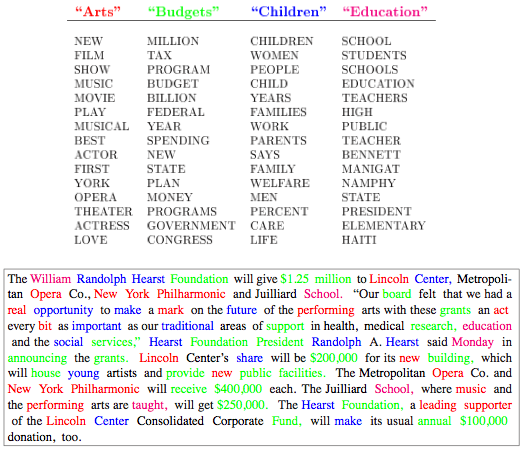

In [1]:
from IPython.display import Image
Image(filename='LDA Model Example.png')

### 아래는 과제로 돌린 예제입니다.

In [2]:
from gensim import corpora, models, similarities
from itertools import chain
import nltk
from nltk.corpus import stopwords
from operator import itemgetter
import gensim
import re
import csv
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

C:\Users\a\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:64: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if 'order' in inspect.getargspec(np.copy)[0]:


In [3]:
def preprocessing(text):
    #text = text.decode("utf8")
    # tokenize into words
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    # remove stopwords
    stop = stopwords.words('english')
    tokens = [token for token in tokens if token not in stop]
    # remove words less than three letters
    tokens = [word for word in tokens if len(word) >= 3]
    # lower capitalization
    tokens = [word.lower() for word in tokens]
    # lemmatize
    lmtzr = WordNetLemmatizer()
    tokens = [lmtzr.lemmatize(word) for word in tokens]
    preprocessed_text= ' '.join(tokens)
    return preprocessed_text

In [4]:
smsdata = open('SMSSpamCollection.txt') # check the structure of this file!
sms_data = []
sms_labels = []
csv_reader = csv.reader(smsdata,delimiter='\t')
for line in csv_reader:
    # adding the sms_id
    sms_labels.append(line[0])
    # adding the cleaned text We are calling preprocessing method
    sms_data.append(preprocessing(line[1]))
#smsdata.close()

In [5]:
documents = [document for document in sms_data]
stoplist = stopwords.words('english')
texts = [[word for word in document.lower().split() if word not in stoplist] for document in documents]

In [6]:
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [7]:
tfidf = models.TfidfModel(corpus)
print (tfidf)

TfidfModel(num_docs=5572, num_nnz=45214)


In [8]:
corpus_tfidf = tfidf[corpus]
print (corpus_tfidf)

In [9]:
lsi = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=100)
#lsi.print_topics(20)
n_topics = 5
lda = models.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=n_topics)

In [48]:
for i in range(0,n_topics):
    temp = lda.show_topic(i,10)
    terms=[]
    for term in temp:
        terms.append(term[1])
        print ("Top 10 terms for topic #"+str(i)+": "+ ",".join(terms))

Top 10 terms for topic #0: call
Top 10 terms for topic #0: call,...
Top 10 terms for topic #0: call,...,number
Top 10 terms for topic #0: call,...,number,prize
Top 10 terms for topic #0: call,...,number,prize,claim
Top 10 terms for topic #0: call,...,number,prize,claim,want
Top 10 terms for topic #0: call,...,number,prize,claim,want,cash
Top 10 terms for topic #0: call,...,number,prize,claim,want,cash,urgent
Top 10 terms for topic #0: call,...,number,prize,claim,want,cash,urgent,got
Top 10 terms for topic #0: call,...,number,prize,claim,want,cash,urgent,got,tell
Top 10 terms for topic #1: home
Top 10 terms for topic #1: home,...
Top 10 terms for topic #1: home,...,good
Top 10 terms for topic #1: home,...,good,going
Top 10 terms for topic #1: home,...,good,going,get
Top 10 terms for topic #1: home,...,good,going,get,like
Top 10 terms for topic #1: home,...,good,going,get,like,bus
Top 10 terms for topic #1: home,...,good,going,get,like,bus,day
Top 10 terms for topic #1: home,...,good,goi

In [41]:
for i in range(0,n_topics):
    temp = lsi.show_topic(i,10)
    terms=[]
    for term in temp:
        terms.append(term[1])
        print ("Top 10 terms for topic #"+str(i)+": "+ ",".join(terms))

Top 10 terms for topic #0: ...
Top 10 terms for topic #0: ...,lor
Top 10 terms for topic #0: ...,lor,call
Top 10 terms for topic #0: ...,lor,call,'ll
Top 10 terms for topic #0: ...,lor,call,'ll,later
Top 10 terms for topic #0: ...,lor,call,'ll,later,sorry
Top 10 terms for topic #0: ...,lor,call,'ll,later,sorry,home
Top 10 terms for topic #0: ...,lor,call,'ll,later,sorry,home,come
Top 10 terms for topic #0: ...,lor,call,'ll,later,sorry,home,come,get
Top 10 terms for topic #0: ...,lor,call,'ll,later,sorry,home,come,get,got
Top 10 terms for topic #1: later
Top 10 terms for topic #1: later,'ll
Top 10 terms for topic #1: later,'ll,sorry
Top 10 terms for topic #1: later,'ll,sorry,call
Top 10 terms for topic #1: later,'ll,sorry,call,...
Top 10 terms for topic #1: later,'ll,sorry,call,...,meeting
Top 10 terms for topic #1: later,'ll,sorry,call,...,meeting,lor
Top 10 terms for topic #1: later,'ll,sorry,call,...,meeting,lor,free
Top 10 terms for topic #1: later,'ll,sorry,call,...,meeting,lor,fre

In [51]:
import gensim
# -*- coding: utf-8 -*-

def hash32(value):
     return hash(value) & 0xffffffff
    
gensim_model=gensim.models.Word2Vec(texts, size=200, window=8, min_count=5, workers=4, hashfxn=hash32)
gensim_model.init_sims(replace=True)


gensim_model.save('SMSSpamCollection.w2v.txt')
gensim_model.save('SMSSpamCollection.w2v.bin')
#gensim_new_model = gensim.models.Word2Vec.load('SMSSpamCollection.w2v.gensim')

In [54]:
print (gensim_model.doesnt_match("Wen ur lovable bcums angry wid u, dnt take it seriously".split()))

take


In [58]:
gensim_model.most_similar("tell")

[('next', 0.9656999707221985),
 ('mail', 0.9553293585777283),
 ('find', 0.9472464323043823),
 ('murderer', 0.9470925331115723),
 ('single', 0.9456172585487366),
 ('pls', 0.9408206939697266),
 ('87077', 0.9362931847572327),
 ('get', 0.933964192867279),
 ('pick', 0.9317905306816101),
 ('bos', 0.9286006093025208)]

In [61]:
gensim_model.most_similar("chance")

[('weekly', 0.9949743151664734),
 ('attempt', 0.9923849701881409),
 ('won', 0.9912158250808716),
 ('1st', 0.9902712106704712),
 ('poly', 0.9897994995117188),
 ('final', 0.9896497130393982),
 ('gr8', 0.9895504713058472),
 ('xmas', 0.9895496368408203),
 ('urgent', 0.9895156025886536),
 ('polys', 0.9890976548194885)]

In [64]:
gensim_model.most_similar("winner")

[('bonus', 0.9929681420326233),
 ('collection', 0.9913245439529419),
 ('￡2000', 0.9899031519889832),
 ('￡1000', 0.9892078638076782),
 ('complimentary', 0.9870627522468567),
 ('videochat', 0.9856378436088562),
 ('caller', 0.9849966168403625),
 ('￡5000', 0.9848041534423828),
 ('digital', 0.9843708872795105),
 ('opt', 0.9839720726013184)]